### Q1)

Let x be no. of dozen baseballs produced
Let y be no. of dozen softballs produced

Profit has to be maximized.

Maximize 7x + 10y
    subject to:  
    
        5x + 6y <= 3600
        x + 2y <= 960
        x <= 500
        y <= 500
        x,y >=0 
    

### a) 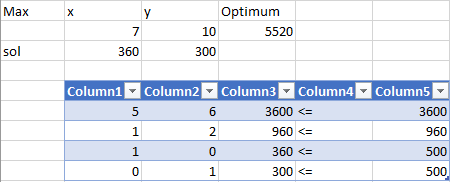
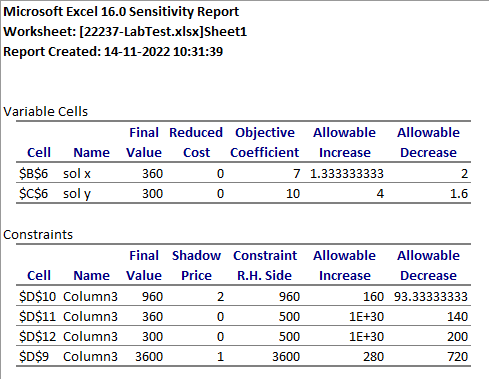

#### b) Write on cost coefficient sensitivity analysis.

The cost cost coefficient sensitivity analysis deals with changing the objective function coefficients and analysing the impact. 
In this case, x can be increased by 1.33 units and decreased by 2 units. 
              y can be increased by 4 units and decreased by 1.6 units.

#### c) Write on Right Hand Side Sensitivity Analysis 

It deals with how changes in the rhs can trigger changes in the optimum value while keeping the optimum same. Changing the rhs means changing the resource limits.
960 can be increased by 160 and decreased by 93.33.
3600 can be increased by 280 and decreased by 720.
Capacities of x and y can be increased indefinitely.
x can be decreased by 140.
y can be decreased by 200.

#### d) Solve the formulated LP problem using scipy.optimise and verify your solution with the solution (a)

In [39]:
import numpy as np
from scipy.optimize import linprog
from scipy import linalg

In [30]:
z = np.array([-7,-10])
A = [[5,6],[1,2]]
b = [3600,960]
bounds = [(0,500),(0,500)] 
res = linprog(c=z, A_ub=A, b_ub=b, bounds=bounds)
res

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -5520.0
       ineqlin:  marginals: array([-1., -2.])
  residual: array([0., 0.])
         lower:  marginals: array([0., 0.])
  residual: array([360., 300.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 2
         slack: array([0., 0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([140., 200.])
             x: array([360., 300.])

In [38]:
z_opt = res.fun
print(f'The optimum value {-z_opt} occurs at the optimal solution {res.x}.\nHence, {int(res.x[0])} dozen baseballs and {int(res.x[1])} dozen softballs have to be manufactured to generate maximum profit of ${-z_opt} subject to the given constraints. Thus, it corresponds to the solution obtained in the Excel.')

The optimum value 5520.0 occurs at the optimal solution [360. 300.].
Hence, 360 dozen baseballs and 300 dozen softballs have to be manufactured to generate maximum profit of $5520.0 subject to the given constraints. Thus, it corresponds to the solution obtained in the Excel.


### Q2) 

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

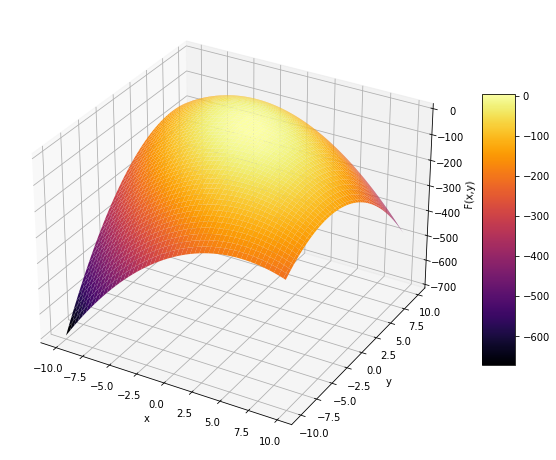

In [29]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.grid()
x = np.arange(-10,10,0.2)
y= np.arange(-10,10,0.2)
X, Y = np.meshgrid(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y') 
ax.set_zlabel('F(x,y)')
surf = ax.plot_surface(X,Y,f(X,Y),cmap= plt.cm.inferno)
fig.colorbar(surf, shrink=0.5, aspect=8)
plt.show()

In [44]:
def f(x1,x2):
    return 4*x1 +6*x2-2*x1**2-2*x1*x2-2*x2**2
def g(x1,x2):
    return [4-4*x1-2*x2,6-2*x1-4*x2]
def gj(x1,x2):
    return [[0,-2],[-2,-4]]
def newton_raphson(xk,e,n):
    xk1 = np.array([[0],[0]])
    x1 = xk[0][0]
    x2 = xk[1][0]
    flag = 0
    
    for i in range(n):
        a = gj(x1,x2)
        xk1 = np.subtract(xk,linalg.inv(a)@g(x1,x2))
        x1 = xk1[0][0]
        x2 = xk1[1][0]
        xk = xk1
        if abs(x1-x2) < e:
            flag = 1
            break    
    
    if flag == 0: 
        return
    
    return xk1

x = np.array([[1],[2]])
y = newton_raphson(x,0.0001,500)
y

array([[ 1.2009599e+16, -1.2009599e+16],
       [ 1.2009599e+16, -1.2009599e+16]])